# This notebook is intended to apply ML algorithms on IDS dataset

##### Steps Followed
   1. Data Cleansing
   2. Feature selection
   3. Creation of Train/Test data
   4. Implementation of ML Algorithms
   5. Evalutaion

In [4]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score

# from scipy import stats
# from sklearn import preprocessing      # import required package for labelencoding
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.naive_bayes import GaussianNB

## 1. Data Cleansing

In [ ]:
path="../dataset/TrafficLabelling /Tuesday-WorkingHours.pcap_ISCX.csv"
t1=time.time()
df_tuesday=pd.read_csv(path)
t2=time.time()
print("time taken to read tuesday csv :: ", t2-t1, " seconds ")

/home/ebryx/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# back up dataframe so don't have to read csv again and again
df_backup=df_tuesday

In [ ]:
df_tuesday.describe()
df_tuesday.head(10)
df_tuesday[' Protocol']

In [ ]:
# In thesis they have mentioned 86 columns, Let's check if they are 1
print(len(df_tuesday.columns))


##### ==>> Finding and dropping undefined / incorrect values in data frame

In [ ]:
# drop record saved as ,,,,,
df_tuesday_dropped.replace(',,', np.nan, inplace=True)

In [19]:
# dropna() removes rows with missing values /NaN in them
df_tuesday_dropped=df_tuesday.dropna( axis=0, how='any')

In [20]:
df_tuesday_dropped.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,445708.000000,445708.000000,445708.000000,4.457080e+05,445708.000000,445708.000000,4.457080e+05,4.457080e+05,445708.000000,445708.000000,...,445708.000000,4.457080e+05,4.457080e+05,4.457080e+05,4.457080e+05,4.457080e+05,4.457080e+05,4.457080e+05,4.457080e+05,4.457080e+05
mean,40440.360934,8871.387296,10.927073,1.078430e+07,11.805092,13.913282,5.304497e+02,2.187310e+04,173.424843,20.589260,...,2.089283,-1.322383e+04,7.269241e+04,4.672624e+04,1.642832e+05,4.830604e+04,3.295945e+06,1.497780e+05,3.408561e+06,3.146825e+06
std,23960.570907,19516.984841,5.476690,2.956206e+07,867.267890,1172.425787,5.678173e+03,2.626360e+06,472.542965,38.944676,...,6.326468,2.667079e+06,6.207005e+05,3.602303e+05,1.050118e+06,5.650754e+05,1.259041e+07,1.982790e+06,1.293520e+07,1.241154e+07
min,0.000000,0.000000,0.000000,-4.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,12614.000000,53.000000,6.000000,1.860000e+02,2.000000,1.000000,6.000000e+00,0.000000e+00,1.000000,0.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,52106.000000,80.000000,6.000000,3.129600e+04,2.000000,2.000000,6.800000e+01,1.370000e+02,41.000000,0.000000,...,1.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,59300.000000,443.000000,17.000000,4.691262e+05,4.000000,2.000000,1.500000e+02,3.360000e+02,62.000000,41.000000,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65535.000000,65505.000000,17.000000,1.200000e+08,206446.000000,276072.000000,2.428415e+06,6.270000e+08,24820.000000,2065.000000,...,1846.000000,1.380000e+02,1.070000e+08,2.410000e+07,1.070000e+08,1.070000e+08,1.200000e+08,7.590000e+07,1.200000e+08,1.200000e+08


#####  ==>> Find duplicate columns and drop one of them

In [21]:
df_tuesday_dropped.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

<br>
We see that Fwd Header Length comes twice but with different anmes so first change name of Fwd Header Length.1 to Fwd Header Length and then remove it

In [22]:
# This runs but don't work accordingly
df_tuesday_dup_rem = df_tuesday_dropped.loc[:,~df_tuesday_dropped.columns.duplicated()]
len(df_tuesday_dup_rem.columns)

85

In [23]:
df_tuesday_dropped.drop(columns=[' Fwd Header Length.1'], axis=1, inplace=True)

/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
len(df_tuesday_dropped.columns)
df_tuesday_dropped.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa


##### ==>>convert categorical and string data to numerical data
Flow ID, Source IP, Destination IP, Timestamp, External IP <br>
using LabelEncoder of sklearn

In [27]:
df_tuesday_dropped['Flow ID'].head(10)

0     192.168.10.3-192.168.10.5-88-49182-6
1     192.168.10.3-192.168.10.5-88-49183-6
2     192.168.10.3-192.168.10.5-88-49184-6
3     192.168.10.3-192.168.10.5-88-49185-6
4     192.168.10.3-192.168.10.5-88-49186-6
5     192.168.10.3-192.168.10.5-88-49189-6
6     192.168.10.3-192.168.10.5-88-49192-6
7    192.168.10.3-192.168.10.5-389-49193-6
8    192.168.10.3-192.168.10.5-389-49193-6
9     192.168.10.3-192.168.10.5-88-49194-6
Name: Flow ID, dtype: object

In [49]:
from sklearn import preprocessing      # import required package for labelencoding
le=preprocessing.LabelEncoder()        # create a label encoder (category) object
le.fit(df_tuesday_dropped['Flow ID'])  # fit encoder to pandas column

LabelEncoder()

In [50]:
# labels
le.classes_
# Apply fitted encoder to the pandas column
le.transform(df_tuesday_dropped["Flow ID"])

array([152266, 152267, 152268, ..., 157091,  79335, 174989])

In [55]:
#encoding Source IP
le_s_ip=preprocessing.LabelEncoder()
le_s_ip.fit(df_tuesday_dropped[' Source IP'])
le_s_ip.transform(df_tuesday_dropped[' Source IP'])

array([2145, 2145, 2145, ..., 2146, 5380, 2149])

In [56]:
# LabelEncoding Destination IP
le_d_ip=preprocessing.LabelEncoder()
le_d_ip.fit(df_tuesday_dropped[' Destination IP'])
le_d_ip.transform(df_tuesday_dropped[' Destination IP'])

array([2558, 2558, 2558, ..., 2558, 2556, 2558])

In [70]:
# Assigning numerical labels to TimeStamp
le_time_stamp=preprocessing.LabelEncoder()
le_time_stamp.fit(df_tuesday_dropped[' Timestamp'])
le_time_stamp.transform(df_tuesday_dropped[' Timestamp'])

array([422, 422, 422, ..., 439, 168,  38])

In [71]:
# External IP is also mentioned in documentation but in data set I have not found any external IP
# repeat above steps for external IP also for label encoding

In [28]:
group=df_tuesday_dropped.groupby(' Label')
group.first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FTP-Patator,172.16.0.1-192.168.10.50-45422-80-6,172.16.0.1,45422,192.168.10.50,80,6,4/7/2017 10:30,5216127,3,1,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SSH-Patator,172.16.0.1-192.168.10.50-52358-22-6,172.16.0.1,52358,192.168.10.50,22,6,4/7/2017 3:11,404,2,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# In the Label feature, the character "–" (Unicode Decimal Code &#8211) used to identify
# the web attack subtypes (Web Attack - Brute Force, Web Attack - XSS, Web Attack -
# SQL Injection) must be replaced with the character "-” (Unicode Decimal Code &#45),
# since utf-8, the default codec of Pandas library, does not recognize it. Otherwise, the
# Pandas library that will not recognize this character and it will fail.
df_tuesday_dropped[' Label'].replace('–', "-", inplace=True)

/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


#### replace different types of attacks to one type "Attack"

In [29]:
grouped=df_tuesday_dropped.groupby(' Label')
grouped.first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FTP-Patator,172.16.0.1-192.168.10.50-45422-80-6,172.16.0.1,45422,192.168.10.50,80,6,4/7/2017 10:30,5216127,3,1,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SSH-Patator,172.16.0.1-192.168.10.50-52358-22-6,172.16.0.1,52358,192.168.10.50,22,6,4/7/2017 3:11,404,2,0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# change labels of all types of attacks to single "Attack label
df_tuesday_dropped.replace('FTP-Patator', 'ATTACK', inplace=True)
df_tuesday_dropped.replace('SSH-Patator', 'ATTACK', inplace=True)
grouped=df_tuesday_dropped.groupby(' Label')
grouped.first()

/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,
ATTACK,172.16.0.1-192.168.10.50-45422-80-6,172.16.0.1,45422,192.168.10.50,80,6,4/7/2017 10:30,5216127,3,1,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BENIGN,192.168.10.3-192.168.10.5-88-49182-6,192.168.10.5,49182,192.168.10.3,88,6,4/7/2017 8:54,640,7,4,...,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# "Flow Bytes/s", "Flow Packets/s" features include the values "Infinity" and "NaN" in
# addition to the numerical values, which can be modified to -1 and 0 respectively to
# make them suitable for machine learning algorithms.
df_tuesday_dropped[[' Flow Packets/s', 'Flow Bytes/s']].replace('Infinity', -1, inplace=True)
df_tuesday_dropped[[' Flow Packets/s', 'Flow Bytes/s']].replace('NaN', 0, inplace=True)

### Saved preprocessed cleaned data to cleaned folder

In [112]:
df_tuesday_dropped.to_csv("../dataset/Cleaned/Tuesday-WorkingHours.pcap_ISCX.csv")

# 2. Feature Selection

In [5]:
df=pd.read_csv("../dataset/Cleaned/Tuesday-WorkingHours.pcap_ISCX.csv")
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

Adding features with most importance for ssh patator and ftp patator 
1. FW Packet length max 

2. flow duration
3. flow packets/s
4. fwd IAt total
5. flow IAT std

6. Fwd packet length std
7. fwd packet length mean
8. total length of backward packets
9. flow bytes/s
10. total length of fwd packets
11. flow iat mean

and some other features that give good results for
12. Bot(Bwd Packet Length Mean)
13. DDos(Bwd Packet Length Std)
14. DDos golden eye (Flow IAT Max)
15. Total Fwd Packets
16. Total Backward Packets'


In [6]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Packets/s',' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Flow Bytes/s", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets'," Label"]
data_frame_for_patator=df[features].copy()
data_frame_for_patator.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,220,135.557286,107.349008,640,17187.5,640,62.857143,358,1246875,440,64.000000,89.5,445,103.345698,7,4,BENIGN
1,300,192.795228,132.287566,900,14444.44444,900,66.666667,2944,3937777.778,600,75.000000,736.0,684,849.859596,9,4,BENIGN
2,1388,236.433336,677.274651,1205,9128.630705,1205,396.571429,2830,4652282.158,2776,120.500000,707.5,777,816.950631,7,4,BENIGN
3,226,90.767652,110.276708,511,21526.41879,511,64.571429,370,1608610.568,452,51.100000,92.5,299,106.809800,7,4,BENIGN
4,306,148.698266,134.933317,773,16817.59379,773,68.000000,2944,4600258.732,612,64.416667,736.0,531,849.859596,9,4,BENIGN


save cleaned data for tuesday attack 

In [27]:
data_frame_for_patator.to_csv("../dataset/Cleaned/Tuesday-final-clean.csv")

### load dataset consisting of desired features

In [7]:
df=pd.read_csv("../dataset/Cleaned/Tuesday-final-clean.csv")

/home/ebryx/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#avoiding unnnamed column column
df=df[df.columns[1:]]
df.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets,Label
0,220,135.557286,107.349008,640,17187.5,640,62.857143,358,1246875,440,64.000000,89.5,445,103.345698,7,4,BENIGN
1,300,192.795228,132.287566,900,14444.44444,900,66.666667,2944,3937777.778,600,75.000000,736.0,684,849.859596,9,4,BENIGN
2,1388,236.433336,677.274651,1205,9128.630705,1205,396.571429,2830,4652282.158,2776,120.500000,707.5,777,816.950631,7,4,BENIGN
3,226,90.767652,110.276708,511,21526.41879,511,64.571429,370,1608610.568,452,51.100000,92.5,299,106.809800,7,4,BENIGN
4,306,148.698266,134.933317,773,16817.59379,773,68.000000,2944,4600258.732,612,64.416667,736.0,531,849.859596,9,4,BENIGN


 Separate input features and labels from dataframe


In [9]:
X=df[df.columns[0:-1]]
y=df[df.columns[-1]]
X.dtypes

 Fwd Packet Length Max            int64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                     int64
 Flow Packets/s                  object
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets      int64
Flow Bytes/s                     object
Total Length of Fwd Packets       int64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                     int64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
dtype: object

In [10]:
#some more preprocessing for flow bytes/s column replace infinity with 0

X.replace("Infinity", 0, inplace=True)
X['Flow Bytes/s'].replace("Infinity", 0,inplace=True)
X[" Flow Packets/s"].replace("Infinity", 0, inplace=True)


/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/home/ebryx/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
#change type of flow bytes/s from object to float

X["Flow Bytes/s"]=X["Flow Bytes/s"].astype("float")
X[' Flow Packets/s']=X[" Flow Packets/s"].astype("float")
X.dtypes


/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


 Fwd Packet Length Max            int64
 Flow IAT Std                   float64
 Fwd Packet Length Std          float64
Fwd IAT Total                     int64
 Flow Packets/s                 float64
 Flow Duration                    int64
 Fwd Packet Length Mean         float64
 Total Length of Bwd Packets      int64
Flow Bytes/s                    float64
Total Length of Fwd Packets       int64
 Flow IAT Mean                  float64
 Bwd Packet Length Mean         float64
 Flow IAT Max                     int64
 Bwd Packet Length Std          float64
 Total Fwd Packets                int64
 Total Backward Packets           int64
dtype: object

#### Display all rows in column as will be mentioned

In [12]:
pd.set_option('display.max_rows', X.shape[0])
# pd.set_option('display.max_columns', X_train.shape[1])

# X_train.head(3)

### Normalize Data
normalize data using z score so it is easy for our model to learn and outlier could be handled here

In [13]:
# import library for z score calculation
from scipy import stats


In [15]:
X.columns

Index([' Fwd Packet Length Max', ' Flow IAT Std', ' Fwd Packet Length Std',
       'Fwd IAT Total', ' Flow Packets/s', ' Flow Duration',
       ' Fwd Packet Length Mean', ' Total Length of Bwd Packets',
       'Flow Bytes/s', 'Total Length of Fwd Packets', ' Flow IAT Mean',
       ' Bwd Packet Length Mean', ' Flow IAT Max', ' Bwd Packet Length Std',
       ' Total Fwd Packets', ' Total Backward Packets'],
      dtype='object')

In [16]:
t1=time.time()

#cols = list(X.columns)
for col in X:
    #col_zscore = col + '_zscore'
    X[col] = stats.zscore(X[col])
    
t2=time.time()
print("time ::: ", t2-t1 , " seconds to find z score of 16 features")

time :::  0.1486375331878662  seconds to find z score of 13 features


/home/ebryx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
X.head()

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
0,0.098563,-0.252573,0.391301,-0.356854,-0.182335,-0.364781,0.126367,-0.008192,-0.005817,-0.015929,-0.211025,-0.259944,-0.296832,-0.083216,-0.005540,-0.008455
1,0.267860,-0.252563,0.561222,-0.356845,-0.194232,-0.364772,0.160016,-0.007207,0.110033,0.012249,-0.211023,1.816127,-0.296814,2.542713,-0.003234,-0.008455
2,2.570299,-0.252555,4.274543,-0.356834,-0.217286,-0.364762,3.073964,-0.007251,0.140794,0.395471,-0.211012,1.724606,-0.296807,2.426953,-0.005540,-0.008455
3,0.111260,-0.252580,0.411249,-0.356858,-0.163518,-0.364785,0.141509,-0.008187,0.009756,-0.013816,-0.211028,-0.250310,-0.296843,-0.071031,-0.005540,-0.008455
4,0.280557,-0.252570,0.579249,-0.356849,-0.183940,-0.364776,0.171793,-0.007207,0.138555,0.014362,-0.211025,1.816127,-0.296825,2.542713,-0.003234,-0.008455



##  3. Creation of Training and testing data


In [18]:
from sklearn.model_selection import train_test_split     # import module for train test split

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

#### min max normalization
#### i am using z score 

X_train_range=X_train.max()-X_train.min()
X_train_normalized=(X_train-X_train.min())/X_train_range
X_train_normalized

## 4. Applying ML algorithms

### 1) K-NN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
X_test.head(1000)

,Fwd Packet Length Max,Flow IAT Std,Fwd Packet Length Std,Fwd IAT Total,Flow Packets/s,Flow Duration,Fwd Packet Length Mean,Total Length of Bwd Packets,Flow Bytes/s,Total Length of Fwd Packets,Flow IAT Mean,Bwd Packet Length Mean,Flow IAT Max,Bwd Packet Length Std,Total Fwd Packets,Total Backward Packets
282978,-0.267542,-0.252580,-0.340132,-0.356875,-0.151739,-0.364797,-0.013694,-0.008195,0.056352,-0.076865,-0.211028,0.014617,-0.296853,-0.446744,-0.011306,-0.010161
414911,-0.367004,-0.252596,-0.340132,-0.356875,-0.256608,-0.363704,-0.428831,-0.008328,-0.059499,-0.093419,-0.203406,-0.547351,-0.294447,-0.446744,-0.012459,-0.011014
422681,-0.367004,-0.252596,-0.340132,-0.356875,-0.050357,-0.364801,-0.428831,-0.008328,-0.059499,-0.093419,-0.211031,-0.547351,-0.296862,-0.446744,-0.012459,-0.011014
189739,-0.248496,2.449914,-0.308173,2.528044,-0.256875,2.507581,0.030469,-0.008162,-0.059498,-0.056788,2.634744,-0.197325,2.198604,-0.406637,-0.009000,-0.008455
130843,-0.276007,-0.252596,-0.340132,-0.356875,-0.256589,-0.363780,-0.049025,-0.008301,-0.059336,-0.085846,-0.203930,-0.319352,-0.294613,-0.446744,-0.012459,-0.011014
43999,-0.269658,-0.230855,-0.335314,-0.346927,-0.256827,-0.352783,-0.026943,-0.008244,-0.059461,-0.077393,-0.183184,-0.192508,-0.277335,-0.265170,-0.011306,-0.010161
299035,-0.278123,-0.249518,-0.340132,-0.356875,-0.256313,-0.363759,-0.057857,-0.008244,-0.059072,-0.078626,-0.208622,-0.190902,-0.294571,-0.446744,-0.011306,-0.010161
20242,-0.367004,-0.252596,-0.340132,-0.356717,-0.255018,-0.364644,-0.428831,-0.008328,-0.059499,-0.093419,-0.209942,-0.547351,-0.296517,-0.446744,-0.011306,-0.011867
344090,-0.280239,-0.246506,-0.340132,-0.356874,-0.256591,-0.362740,-0.066690,-0.008237,-0.059271,-0.078978,-0.206261,-0.162001,-0.292327,-0.446744,-0.011306,-0.010161
277893,-0.269658,-0.252586,-0.340132,-0.356875,-0.157747,-0.364797,-0.022527,-0.008232,0.025622,-0.077217,-0.211027,-0.139522,-0.296856,-0.446744,-0.011306,-0.010161


In [19]:
t1=time.time()
yhat = None

for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    model_knn=knn.fit(X_train,y_train)
    yhat=model_knn.predict(X_test)
    print("for " , i,  " as K, accuracy is : ", accuracy_score(y_test, yhat))
t2=time.time()
print(" time for ", i ," k's :: ", (t2-t1)/60 , " minutes")

for  1  as K, accuracy is :  0.9877835363801575
for  2  as K, accuracy is :  0.9811200107693343
for  3  as K, accuracy is :  0.9899822754705975
for  4  as K, accuracy is :  0.9880639877947545
for  5  as K, accuracy is :  0.9920015256556954
for  6  as K, accuracy is :  0.9914181867133338
for  7  as K, accuracy is :  0.9925848645980571
for  8  as K, accuracy is :  0.9925848645980571
for  9  as K, accuracy is :  0.9925960826546409
for  10  as K, accuracy is :  0.9925960826546409
for  11  as K, accuracy is :  0.9926970451638958
for  12  as K, accuracy is :  0.9925960826546409
for  13  as K, accuracy is :  0.993044804917996
for  14  as K, accuracy is :  0.993044804917996
for  15  as K, accuracy is :  0.9930111507482444
for  16  as K, accuracy is :  0.9930223688048283
for  17  as K, accuracy is :  0.9930111507482444
for  18  as K, accuracy is :  0.9930223688048283
for  19  as K, accuracy is :  0.9930111507482444
for  20  as K, accuracy is :  0.9930111507482444
 time for  20  k's ::  67.18388

In [59]:
knn=KNeighborsClassifier(n_neighbors=14)
model_knn=knn.fit(X_train,y_train)
yhat=model_knn.predict(X_test)

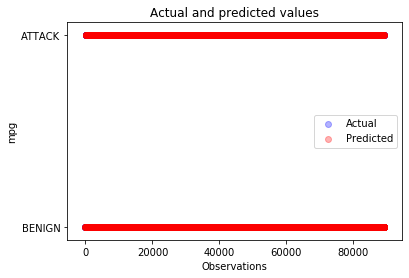

In [62]:
ax = plt.subplots()

plt.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
plt.scatter(x = range(0, yhat.size), y=yhat, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)
acc=(2119+86403)/(2119+612+8+86403)
print(acc)

0.993044804917996


### 2) Naive bayes

#####     2.1) Gaussian naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [21]:
t1=time.time()

gnb = GaussianNB()
model_gnb = gnb.fit(X_train, y_train)
yhat=model_gnb.predict(X_test)

print("Accuracy :: ", accuracy_score(y_test,yhat))

t2=time.time()
print(" time for Naive Baye's :: ", (t2-t1) , " seconds")

Accuracy ::  0.2863745484732225
 time for Naive Baye's ::  0.9700474739074707  seconds


results for gausian naive bayes are not very good, so we use bernoulli Naive Bayes

##### 2.2) Bernoulli Naive Bayes

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
clf = BernoulliNB()
clf.fit(X_train, y_train)
yhat=clf.predict(X_test)
print("Accuracy ::: ", accuracy_score(y_test,yhat))

Accuracy :::  0.9734019878396266
